In [2]:
import os
os.chdir("/home/yasser/classes/DL26/final_Project")

In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload    

from src.utils.config import CONFIG

from src.utils.data_loader import create_loaders
from src.utils.models_architecture import SRResNet     
from src.utils.helper_functions import train_sr, val_sr, plot_sr_progress
from src.utils.train_model_sr import train_model_sr
import json


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device : {device}")

# CONFIG FROM YAML 
data_root      = CONFIG["paths"]["output_root"]
batch_size     = 16 #CONFIG["training"]["batch_size"]
num_workers    = CONFIG["training"]["num_workers"]
use_aug        = CONFIG["training"].get("use_augmentation", True)

# HYPERPARAMS FROM CONFIG 
lr              = 0.0001 #CONFIG["training"]["lr"]
weight_decay    = 0.0001
num_epochs      = 15 #CONFIG["training"]["epochs"]
step_size       = 30 #CONFIG["training"]["scheduler_step_size"]
gamma           = 0.5 #CONFIG["training"]["scheduler_gamma"]


# LOAD DATA 

train_loader, val_loader, test_loader = create_loaders(
    root=data_root,
    batch_size=batch_size,
    num_workers=num_workers,
    use_augmentation=use_aug
)


device : cuda

 DATA LOADED:
  Train: 64800 samples
  Val:   8100 samples
  Test:  8100 samples


/home/yasser/classes/DL26/final_Project/src/utils/train_model_sr.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(best_model_path, map_location=d

 Loading training history...
Loading checkpoint: src/models/checkpoints/SRESNET/best_SRESNET.pth
 Resume from epoch 85 | Best PSNR = 28.00

 [SRRESNET] Epoch 86/100


 New BEST model saved at epoch 86 with PSNR = 28.03
Train loss: 0.029890 | Train PSNR: 26.14 dB
Val   loss: 0.026826 | Val   PSNR: 28.03 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 87/100


Train loss: 0.029767 | Train PSNR: 26.18 dB
Val   loss: 0.027197 | Val   PSNR: 27.93 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 88/100


Train loss: 0.029734 | Train PSNR: 26.18 dB
Val   loss: 0.027286 | Val   PSNR: 27.92 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 89/100


Train loss: 0.029722 | Train PSNR: 26.18 dB
Val   loss: 0.027496 | Val   PSNR: 27.87 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 90/100


Train loss: 0.029712 | Train PSNR: 26.18 dB
Val   loss: 0.027105 | Val   PSNR: 27.98 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 91/100


Train loss: 0.029695 | Train PSNR: 26.18 dB
Val   loss: 0.027227 | Val   PSNR: 27.94 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 92/100


Train loss: 0.029681 | Train PSNR: 26.19 dB
Val   loss: 0.027310 | Val   PSNR: 27.92 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 93/100


Train loss: 0.029689 | Train PSNR: 26.18 dB
Val   loss: 0.027215 | Val   PSNR: 27.94 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 94/100


Train loss: 0.029672 | Train PSNR: 26.19 dB
Val   loss: 0.027019 | Val   PSNR: 27.97 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 95/100


Train loss: 0.029656 | Train PSNR: 26.19 dB
Val   loss: 0.027115 | Val   PSNR: 27.95 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 96/100


Train loss: 0.029663 | Train PSNR: 26.19 dB
Val   loss: 0.027150 | Val   PSNR: 27.94 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 97/100


Train loss: 0.029641 | Train PSNR: 26.19 dB
Val   loss: 0.027397 | Val   PSNR: 27.93 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 98/100


Train loss: 0.029640 | Train PSNR: 26.19 dB
Val   loss: 0.027103 | Val   PSNR: 27.97 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 99/100


Train loss: 0.029639 | Train PSNR: 26.20 dB
Val   loss: 0.027282 | Val   PSNR: 27.92 dB
-> LR: 0.00002500

 [SRRESNET] Epoch 100/100


Train loss: 0.029644 | Train PSNR: 26.19 dB
Val   loss: 0.027195 | Val   PSNR: 27.94 dB
-> LR: 0.00002500


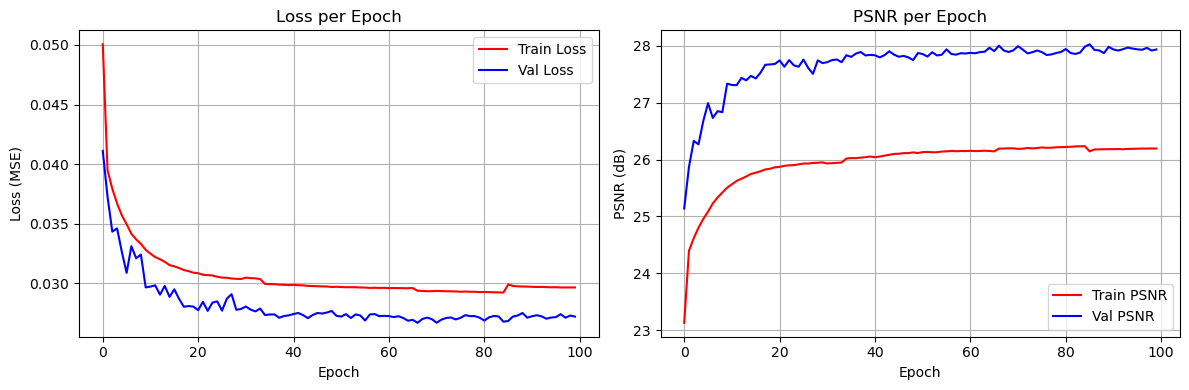

0

In [4]:
model = SRResNet().to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
best_model_path = CONFIG["model"]["best_SRESNET_path"]
history_path = CONFIG["history"]["SRESNET_history_path"]

train_model_sr(
    model=model,
    model_name="SRRESNET",
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=num_epochs,
    scale_factor=4,
    model_requires_upscale=False,
    best_model_path=best_model_path,
    history_path=history_path,
    use_amp=True  
)


In [4]:
num_epochs=10
if os.path.exists(history_path):
        print(" Loading training history...")
        with open(history_path, "r") as f:
            history = json.load(f)

        train_losses = history["train_losses"]
        val_losses   = history["val_losses"]
        train_psnrs  = history["train_psnrs"]
        val_psnrs    = history["val_psnrs"]
        start_epoch = len(train_losses)
        print(start_epoch)
num_epochs += start_epoch
#for epoch in range(start_epoch,num_epochs):
#    print(epoch+1)

 Loading training history...
70


In [1]:
device = "cuda" if torch.cuda.is_available() else "cpu"

to_tensor = T.ToTensor()
if os.path.exists(best_model_path):
        print("Loading checkpoint:", best_model_path)
        checkpoint = torch.load(best_model_path, map_location=device)
def psnr(sr, hr):
    mse = np.mean((sr - hr) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(1.0 / np.sqrt(mse))


def compare_sr_models(
    hr_path,
    srresnet_model,
    scale=4
):
    srresnet_model.eval()

    # LOAD HR
    hr_img = Image.open(hr_path).convert("RGB")
    hr_tensor = to_tensor(hr_img).unsqueeze(0).to(device)

    # GENERATE LR SYNTHETIC
    lr_img = hr_img.resize(
        (hr_img.width // scale, hr_img.height // scale),
        Image.BICUBIC
    )
    lr_tensor = to_tensor(lr_img).unsqueeze(0).to(device)

    # BICUBIC UPSCALE
    bicubic_tensor = F.interpolate(
        lr_tensor,
        scale_factor=scale,
        mode="bicubic",
        align_corners=False
    )

    # srresnet
    with torch.no_grad():
        srresnet = srresnet_model(lr_tensor)


    # TO NUMPY
    hr_np       = hr_tensor.squeeze(0).permute(1,2,0).cpu().numpy()
    bicubic_np  = bicubic_tensor.squeeze(0).permute(1,2,0).cpu().numpy()
    srresnet_np  = srresnet.squeeze(0).permute(1,2,0).cpu().numpy()

    lr_np       = lr_tensor.squeeze(0).permute(1,2,0).cpu().numpy()

    # PSNR
    psnr_bic  = psnr(bicubic_np, hr_np)
    psnr_srr  = psnr(srresnet_np, hr_np)


    print(" PSNR RESULTS (Synthetic LR)")
    print(f"  Bicubic : {psnr_bic:.2f} dB")
    print(f"  srresnet   : {psnr_srr:.2f} dB")


    # DISPLAY
    titles = [
        "LR (Synthetic)",
        f"Bicubic\n{psnr_bic:.2f} dB",
        f"srresnet\n{psnr_srr:.2f} dB",
        "HR (Ground Truth)"
    ]

    images = [lr_np, bicubic_np, srresnet_np, hr_np]

    plt.figure(figsize=(18, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 5, i + 1)
        plt.imshow(np.clip(img, 0, 1))
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

compare_sr_models(
    hr_path="data/preprocessed/test/HR/austin1_r00_c01.png",
    srresnet_model=model,
    scale=4
)

NameError: name 'torch' is not defined